In [ ]:
import keras as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist=tf.datasets.mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
###neural network

model=tf.models.Sequential() ##blank model
model.add(tf.layers.Flatten())  ##input layer
model.add(tf.layers.Dense(784,activation='relu'))  ##hidden layer  28x28(784)
model.add(tf.layers.Dense(10,activation='softmax'))   ##output layer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
### scale the data
xtrain_scale=xtrain/255
xtest_scale=xtest/255

In [ ]:
### train model
model.fit(xtrain_scale,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3163 - accuracy: 0.9048
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0747 - accuracy: 0.9778
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0471 - accuracy: 0.9849
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0296 - accuracy: 0.9912
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 8/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 9/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 10/15
1875/1875 [==============================] - 14s 7ms/step - l

In [ ]:
### testing
ypred=model.predict(xtest_scale)

In [ ]:
ypred[5]

array([6.3358733e-20, 9.9999678e-01, 7.8871622e-14, 7.0606400e-18,
       9.0461610e-10, 3.8214873e-19, 1.1411962e-15, 3.2213213e-06,
       1.6688374e-12, 7.6960613e-20], dtype=float32)

In [ ]:
np.argmax(ypred[5])

1

In [ ]:
ytest[5]

1

In [ ]:
model.evaluate(xtest_scale,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0955 - accuracy: 0.9832


[0.09548802673816681, 0.9832000136375427]

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,np.argmax(ypred,axis=1))
cm

array([[ 974,    1,    0,    0,    1,    0,    1,    0,    1,    2],
       [   0, 1130,    1,    1,    0,    0,    1,    1,    1,    0],
       [   2,    1, 1017,    4,    0,    0,    1,    6,    1,    0],
       [   0,    0,    2,  994,    0,    8,    0,    1,    4,    1],
       [   2,    0,    2,    0,  950,    0,    3,    6,    3,   16],
       [   2,    0,    0,    6,    0,  879,    2,    0,    2,    1],
       [   2,    3,    1,    1,    3,    3,  945,    0,    0,    0],
       [   0,    1,    8,    0,    0,    0,    0, 1013,    2,    4],
       [   3,    1,    4,    6,    1,    1,    4,    5,  948,    1],
       [   0,    3,    0,    6,    2,    1,    1,   12,    2,  982]])

In [ ]:
ytest

In [ ]:
np.argmax(ypred,axis=1) ### axis compare all values

In [ ]:
import cv2

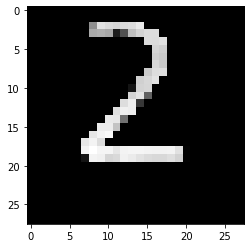

In [ ]:
img = cv2.imread("/content/2.png",0)
img=cv2.resize(img,(28,28))
img=cv2.bitwise_not(img)
img=img/255
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
img.shape

(28, 28)

In [ ]:
np.argmax(model.predict(np.array([[img]])))

2